In [2]:
import pandas as pd
import numpy as np

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from stock.train import get_ticker_df, add_ticker_features
from stock.data import Fields as fld

/Users/yingxie/.conda/envs/fastai-cpu/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
df = get_ticker_df('data', 'xlf')
add_ticker_features(df)

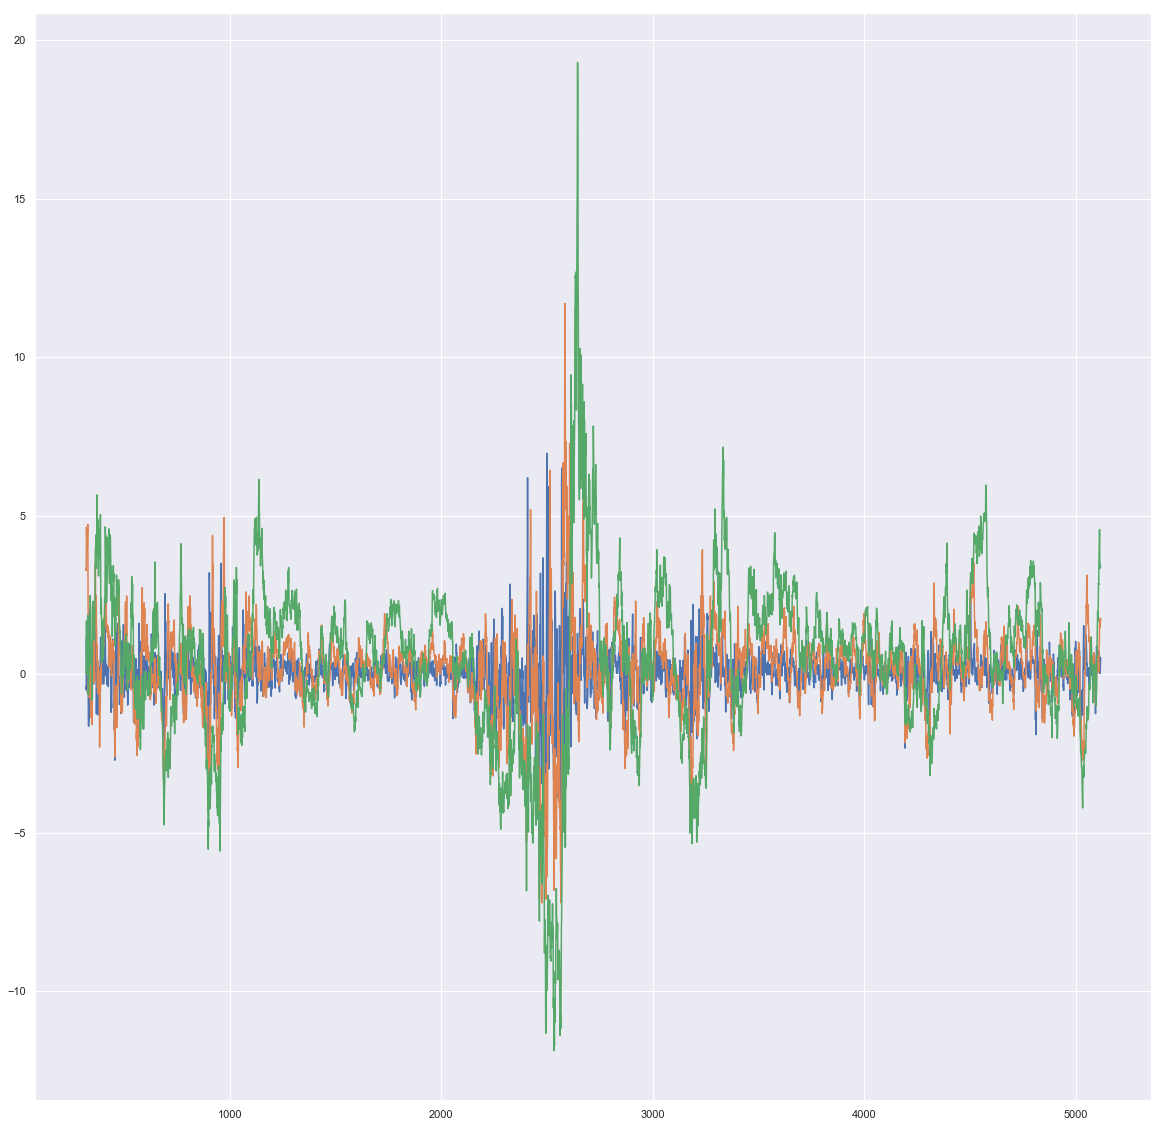

In [3]:
plt.figure(figsize=(20,20))
# plt.plot(df[fld.COL_ADJ_CLOSE])
plt.plot(df['d_5']*20)
plt.plot(df['d_20']*20)
plt.plot(df['d_80']*20)

In [4]:
df['d_80'].describe()

count    4799.000000
mean        0.021352
std         0.128858
min        -0.594032
25%        -0.034933
50%         0.029792
75%         0.087662
max         0.964635
Name: d_80, dtype: float64

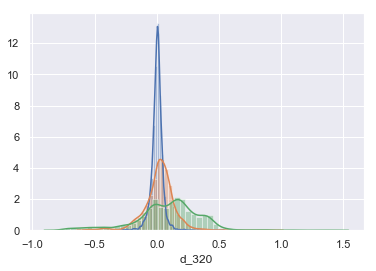

In [6]:
sns.distplot(df['d_10'])
sns.distplot(df['d_80'])
sns.distplot(df['d_320'])

In [14]:
pc_df = pd.read_csv('data/equitypc.csv')
pc_df.timestamp = pd.to_datetime(pc_df.timestamp)

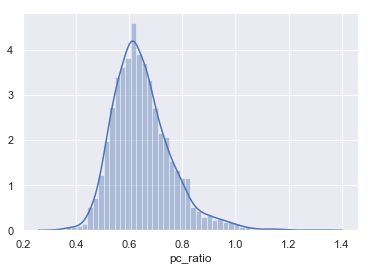

In [5]:
sns.distplot(pc_df.pc_ratio)

In [6]:
spy_df = pd.read_csv('data/spy.csv')

In [12]:
add_ticker_features(spy_df, 'spy')

In [17]:
spy_df.timestamp = pd.to_datetime(spy_df.timestamp)

In [18]:
spy_pc = pd.merge(spy_df, pc_df, how='inner', on='timestamp')

/Users/yingxie/.conda/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c4c5d1e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c4c9eef28>]], dtype=object)

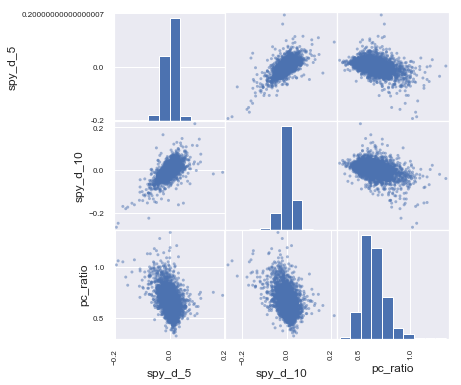

In [23]:
pd.scatter_matrix(spy_pc[['spy_d_5', 'spy_d_10', 'pc_ratio']], figsize=(6, 6))

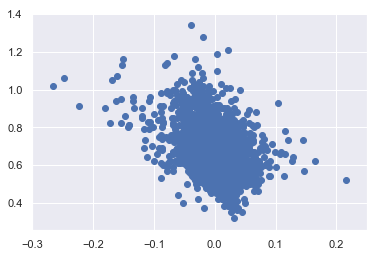

In [26]:
plt.scatter(spy_pc.spy_d_10, spy_pc.pc_ratio)

In [36]:
spy_pc[spy_pc.spy_d_10 > 0.01].pc_ratio.describe()

count    1705.000000
mean        0.609865
std         0.091050
min         0.320000
25%         0.550000
50%         0.600000
75%         0.660000
max         1.210000
Name: pc_ratio, dtype: float64

In [37]:
spy_pc[spy_pc.spy_d_10 < 0.01].pc_ratio.describe()

count    2215.000000
mean        0.677725
std         0.116974
min         0.370000
25%         0.600000
50%         0.660000
75%         0.740000
max         1.340000
Name: pc_ratio, dtype: float64

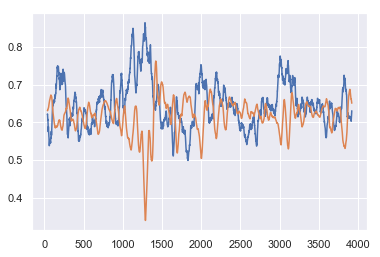

In [51]:
plt.plot(spy_pc.pc_ratio.rolling(40).mean())
plt.plot(spy_pc.spy_d_40.rolling(40).mean() + 0.6)

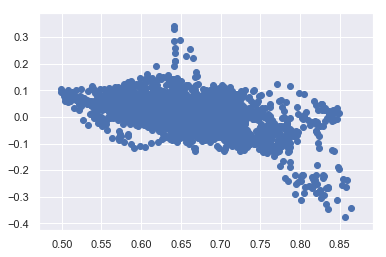

In [54]:
plt.scatter(spy_pc.pc_ratio.rolling(40).mean(), spy_pc.spy_d_40)